In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("stats.csv")
cols = ["un","deux","trois","quatre","cinq"]
df.head()

step  id  time    un  deux  trois  quatre  cinq
0     1  10     1 -0.52  0.46  -0.30    0.96 -0.06
1     1  11     1  0.90 -0.80  -0.24    0.52  0.48
2     1  12     1 -0.90  0.42  -0.14    0.92 -1.00
3     1  13     1 -0.14  0.10   0.02    0.44 -0.28
4     1  14     1  0.02 -0.16   0.20    0.58  0.10

# EVOLUTION

In [35]:
dfg = df.groupby("step").agg(np.mean)

In [36]:
dflisse = lissage_df(dfg,30)

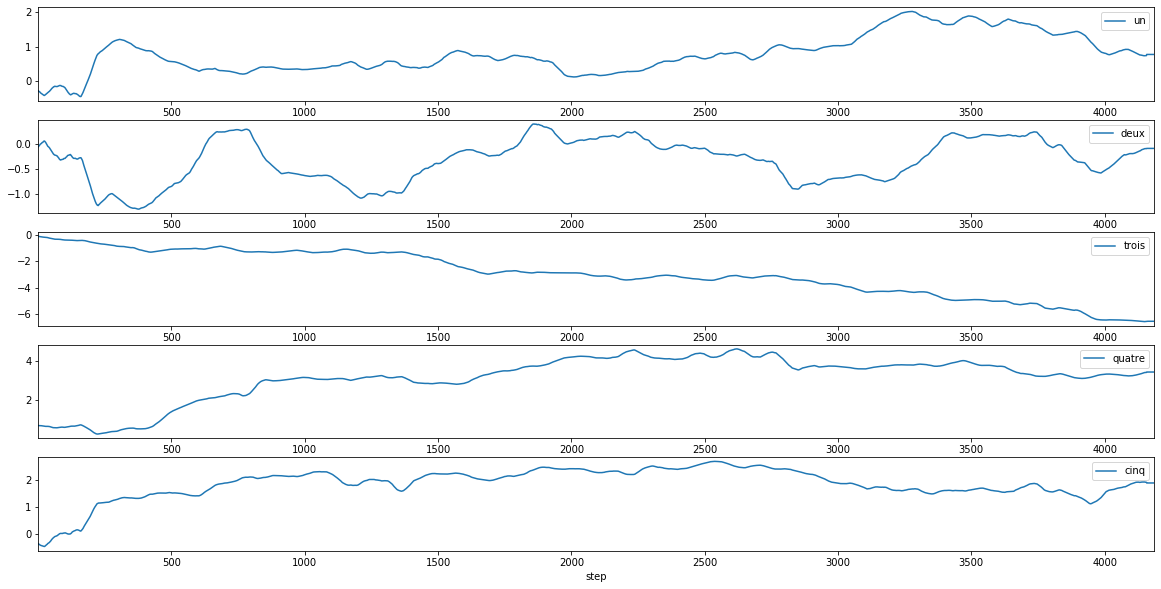

In [37]:
d = len(cols)
fig,axes = plt.subplots(d,1);
p = dflisse
for i in range(d):
    p.plot(y=cols[i],ax =axes[i],figsize = (20,10))

In [5]:
# LISSAGE
def lissage(k,v):
    l = []
    n = 2*k+1
    for i in range(k):
        l.append(np.mean(v[:(i+k)]))
    for i in range(k,len(v)-k):
        l.append(np.mean(v[(i-k):(i+k)]))
    for i in range(len(v)-k,len(v)):
        l.append(np.mean(v[(len(v)-k):]))
    return l

def lissage_df(df,k):
    df_lisse = pd.DataFrame(index = df.index)
    for c in df.columns:
        df_lisse[c] = lissage(k, df[c])
    return df_lisse

In [47]:
df.groupby("id").apply(max).sort_values("time").set_index("time").plot(y = cols,figsize=(15,7))

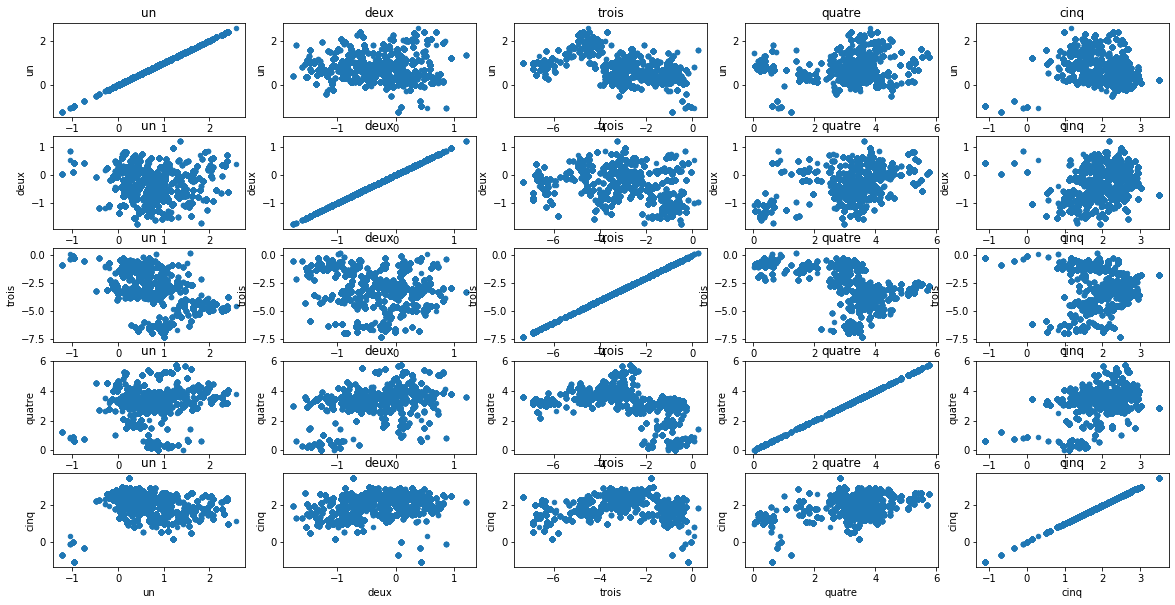

In [50]:
d = len(cols)
fig,axes = plt.subplots(d,d);
for i in range(d):
    for j in range(d):
        df[df.time > np.mean(df.time)].plot.scatter(x = cols[j], y = cols[i],ax=axes[i,j],figsize = (20,10),title=cols[j])